In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
import seaborn as sns

In [10]:
from wordcloud import WordCloud

In [11]:
from collections import Counter

In [12]:
from sklearn.linear_model import LogisticRegression 

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
import xgboost as xgb

In [15]:
import nltk

In [16]:
from nltk.corpus import stopwords

In [17]:
df=pd.read_csv("Emotion_classify_Data.csv")


In [18]:
df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [20]:
df.describe(include="all")

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [21]:
df.columns

Index(['Comment', 'Emotion'], dtype='object')

In [22]:
df.shape

(5937, 2)

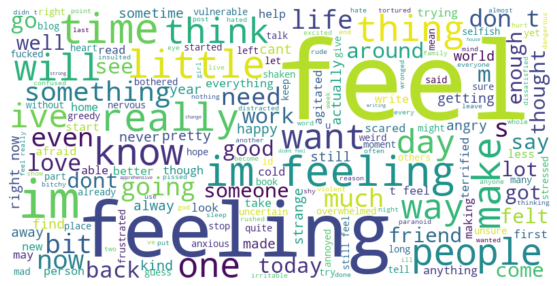

In [23]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Comment']))

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words = set(stopwords.words('english'))


In [26]:
def RemoveStopWords(ele):
    lis=ele.split()
    result=[]
    
    for i in lis:
        if i not in stop_words:
            result.append(i)
    
    return " ".join(result)
    

In [27]:
df['Comment']=df['Comment'].apply(RemoveStopWords)

In [28]:
df

,Comment,Emotion
0,seriously hate one subject death feel reluctan...,fear
1,im full life feel appalled,anger
2,sit write start dig feelings think afraid acce...,fear
3,ive really angry r feel like idiot trusting fi...,joy
4,feel suspicious one outside like rapture happe...,fear
...,...,...
5932,begun feel distressed,fear
5933,left feeling annoyed angry thinking center stu...,anger
5934,ever get married everything ready offer got to...,joy
5935,feel reluctant applying want able find company...,fear


In [29]:
word_freq = Counter(' '.join(df['Comment']).split())


In [30]:
word_freq

Counter({'seriously': 18,
         'hate': 53,
         'one': 210,
         'subject': 6,
         'death': 10,
         'feel': 4047,
         'reluctant': 59,
         'drop': 7,
         'im': 943,
         'full': 25,
         'life': 178,
         'appalled': 10,
         'sit': 29,
         'write': 71,
         'start': 63,
         'dig': 3,
         'feelings': 104,
         'think': 216,
         'afraid': 77,
         'accept': 10,
         'possibility': 7,
         'might': 57,
         'make': 183,
         'ive': 199,
         'really': 323,
         'angry': 92,
         'r': 6,
         'like': 992,
         'idiot': 7,
         'trusting': 19,
         'first': 77,
         'place': 57,
         'suspicious': 30,
         'outside': 18,
         'rapture': 1,
         'happened': 25,
         'something': 193,
         'jealous': 50,
         'becasue': 1,
         'wanted': 50,
         'kind': 76,
         'love': 145,
         'true': 16,
         'connection': 8,

In [31]:
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count']).reset_index()


In [32]:
word_freq_df = word_freq_df.rename(columns={'index': 'word'})


In [33]:
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)


In [34]:
word_freq_df

,word,count
5,feel,4047
56,feeling,1964
27,like,992
8,im,943
115,little,326
...,...,...
1934,logical,1
5359,heed,1
1936,uuuugh,1
5357,mermaidhaire,1


<AxesSubplot:xlabel='word', ylabel='count'>

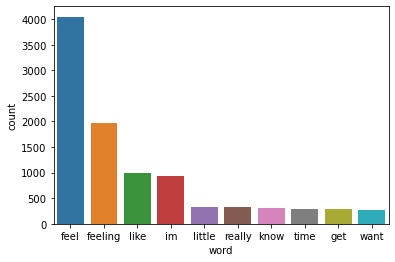

In [35]:
sns.barplot(x=word_freq_df['word'][:10],y=word_freq_df['count'][:10])

In [36]:
le=LabelEncoder()


In [37]:
df['Emotion']=le.fit_transform(df['Emotion'])



In [38]:
df

,Comment,Emotion
0,seriously hate one subject death feel reluctan...,1
1,im full life feel appalled,0
2,sit write start dig feelings think afraid acce...,1
3,ive really angry r feel like idiot trusting fi...,2
4,feel suspicious one outside like rapture happe...,1
...,...,...
5932,begun feel distressed,1
5933,left feeling annoyed angry thinking center stu...,0
5934,ever get married everything ready offer got to...,2
5935,feel reluctant applying want able find company...,1


In [39]:
X=df['Comment']

In [40]:
y=df['Emotion']

In [41]:
X

0       seriously hate one subject death feel reluctan...
1                              im full life feel appalled
2       sit write start dig feelings think afraid acce...
3       ive really angry r feel like idiot trusting fi...
4       feel suspicious one outside like rapture happe...
                              ...                        
5932                                begun feel distressed
5933    left feeling annoyed angry thinking center stu...
5934    ever get married everything ready offer got to...
5935    feel reluctant applying want able find company...
5936           wanted apologize feel like heartless bitch
Name: Comment, Length: 5937, dtype: object

In [42]:
y

0       1
1       0
2       1
3       2
4       1
       ..
5932    1
5933    0
5934    2
5935    1
5936    0
Name: Emotion, Length: 5937, dtype: int32

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [44]:
tdidf_Vectorizer=TfidfVectorizer(max_features=30000)


In [45]:
tdidf_Vectorizer

TfidfVectorizer(max_features=30000)

In [46]:
# Fiting and transforming the training data


In [47]:
X_train_tfidf=tdidf_Vectorizer.fit_transform(X_train)

In [48]:
X_train_tfidf

<3977x6924 sparse matrix of type '<class 'numpy.float64'>'
	with 35999 stored elements in Compressed Sparse Row format>

In [49]:
# Transforming the testing data


In [50]:
X_test_tfidf=tdidf_Vectorizer.transform(X_test)

In [51]:
X_test_tfidf

<1960x6924 sparse matrix of type '<class 'numpy.float64'>'
	with 15766 stored elements in Compressed Sparse Row format>

# RandomForestClassifier

In [52]:
rfc=RandomForestClassifier()


In [53]:
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [54]:
y_pred=rfc.predict(X_train_tfidf)


In [55]:
accuracy_score(y_train,y_pred)

0.9992456625597184

In [56]:
y_pred=rfc.predict(X_test_tfidf)


In [57]:
accuracy_score(y_test,y_pred)

0.9418367346938775

In [58]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

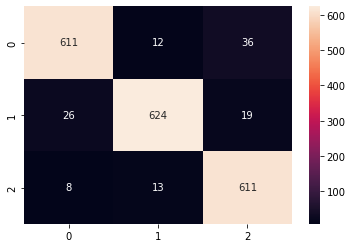

In [59]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       659
           1       0.96      0.93      0.95       669
           2       0.92      0.97      0.94       632

    accuracy                           0.94      1960
   macro avg       0.94      0.94      0.94      1960
weighted avg       0.94      0.94      0.94      1960



In [61]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=rfc.predict(input_tfidf)
    predicted_emotion=le.inverse_transform(predicted_label)
    return predicted_emotion

In [62]:
user_input=input("Enter a comment")


Enter a commentim so full of life i feel appalled


In [63]:
emotion=predict_emotion(user_input)


In [64]:
print(emotion)

['anger']


# LogisticRegression

In [65]:
lr=LogisticRegression()



In [66]:
lr.fit(X_train_tfidf,y_train)

LogisticRegression()

In [67]:
y_pred=lr.predict(X_train_tfidf)


In [68]:
accuracy_score(y_train,y_pred)

0.9869248177017853

In [69]:
y_pred=lr.predict(X_test_tfidf)


In [70]:
accuracy_score(y_test,y_pred)

0.9331632653061225

In [71]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

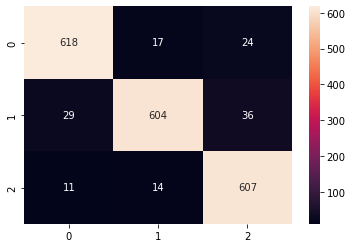

In [72]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       659
           1       0.95      0.90      0.93       669
           2       0.91      0.96      0.93       632

    accuracy                           0.93      1960
   macro avg       0.93      0.93      0.93      1960
weighted avg       0.93      0.93      0.93      1960



In [74]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=lr.predict(input_tfidf)
    predicted_emotion=le.inverse_transform(predicted_label)
    return predicted_emotion

In [75]:
user_input=input("Enter a comment")


Enter a commenti lost my money


In [76]:
emotion=predict_emotion(user_input)


In [77]:
print(emotion)

['anger']


# KNeighborsClassifier

In [78]:
knc=KNeighborsClassifier()


In [79]:
knc.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

In [80]:
y_pred=knc.predict(X_train_tfidf)


In [81]:
accuracy_score(y_train,y_pred)

0.8868493839577571

In [82]:
y_pred=knc.predict(X_test_tfidf)


In [83]:
accuracy_score(y_test,y_pred)

0.7887755102040817

In [84]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

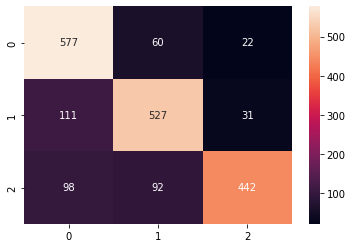

In [85]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       659
           1       0.78      0.79      0.78       669
           2       0.89      0.70      0.78       632

    accuracy                           0.79      1960
   macro avg       0.80      0.79      0.79      1960
weighted avg       0.80      0.79      0.79      1960



In [87]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=knc.predict(input_tfidf)
    predicted_emotion=le.inverse_transform(predicted_label)
    return predicted_emotion

In [88]:
user_input=input("Enter a comment")


Enter a commenti love rain so much


In [89]:
emotion=predict_emotion(user_input)


In [90]:
print(emotion)

['joy']


# XGBClassifier

In [91]:
xgb_i=xgb.XGBClassifier()

In [92]:
xgb_i.fit(X_train_tfidf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [93]:
y_pred=xgb_i.predict(X_train_tfidf)


In [94]:
accuracy_score(y_train,y_pred)

0.9675634900678903

In [95]:
y_pred=xgb_i.predict(X_test_tfidf)


In [96]:
accuracy_score(y_test,y_pred)

0.9372448979591836

In [97]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

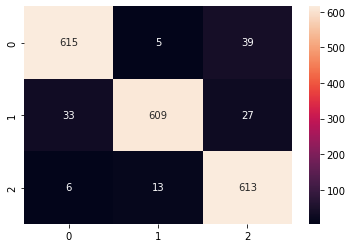

In [98]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       659
           1       0.97      0.91      0.94       669
           2       0.90      0.97      0.94       632

    accuracy                           0.94      1960
   macro avg       0.94      0.94      0.94      1960
weighted avg       0.94      0.94      0.94      1960



In [100]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=xgb_i.predict(input_tfidf)
    predicted_emotion=le.inverse_transform(predicted_label)
    return predicted_emotion

In [101]:
user_input=input("Enter a comment")


Enter a commenti am very confident 


In [102]:
emotion=predict_emotion(user_input)


In [103]:
print(emotion)

['joy']
